# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80 and 90% cloudiness.
* There is no strong relationship between latitude and humidity. However, it is interesting to see that a strong band of cities sits at 100% humidity and a majority of cities seem to be above 80% currently.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

### Dependencies and Setup
* Import matplotlib, pandas and numpy
* Setup API url and CSV file path

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Prepare API information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

### Define Useful Functions
* gen_cities_list - Generate a list of cities randomized by latitude and longitude
* add_city_resp - Add city and API json response data to dictionary of lists
* gen_weather_df - Generate a list of cities randomized by latitude and longitude

In [2]:
def gen_cities_list(n):
    '''
    Generate a list of n cities randomized by latitude and longitude
    '''
    # List for holding lat_lngs and cities
    lat_lngs = list()
    clist = list()

    # Range of latitudes and longitudes
    lat_range = (-90, 90)
    lng_range = (-180, 180)

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=n)
    lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=n)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in clist:
            clist.append(city)

    return clist
##end gen_cities_list(n)

def add_city_resp(wd, c, r):
    '''
    Add city (c) and API json response (r) to dictionary of lists (wd)
    '''
    wd['city'].append(c)
    wd['lat'].append(r['coord']['lat'])
    wd['lng'].append(r['coord']['lon'])
    wd['country'].append(r['sys']['country'])
    wd['date'].append(r['dt'])
    wd['maxtemp'].append(r['main']['temp_max'])
    wd['humidity'].append(r['main']['humidity'])
    wd['cloudiness'].append(r['clouds']['all'])
    wd['windspeed'].append(r['wind']['speed'])
##end add_city_resp(wd, c, r)

def gen_weather_df(qurl, fname, n):
    '''
    Generates a dataframe with data from saved csv file and appends weather data for new list of cities
    Gets weather data for each new city using a series of successive API calls.
    '''
    # Read CSV of saved weather data
    df = pd.read_csv(fname, na_filter=False)
    r, _ = df.shape

    # Check if user really wants to add more cities to the data
    resp = input(f'CSV file already has {r} cities. Do you really wish to add more? (y/n)')
    if resp is not 'y':
        return df

    # get list of new cities 
    clist = [c for c in gen_cities_list(n) if c not in list(df.city)]

    # Enforce API rate limit of 60 per minute
    if len(clist) > 60:
        print(f'Number of cities in list is higher than API limit (60). Limiting to 60!')
        clist = clist[:60]

    # set up dictionary of lists to hold reponse info
    wdict = {
        "city": list(),
        "lat": list(),
        "lng": list(),
        "country": list(),
        "date": list(),
        "maxtemp": list(),
        "humidity": list(),
        "cloudiness": list(),
        "windspeed": list()
    }

    print(f'Fetching weather data for {len(clist)} unique cities.')
    # Loop through the list of cities and perform a request for data on each
    for i, city in enumerate(clist):
        print(f'Processing record {i} | {city}')
        resp = requests.get(query_url + city).json()
        # Check if response is valid
        if resp['cod'] == 200:
            add_city_resp(wdict, city, resp)
        else:
            print(f'{city} not found! Skipping...')

    # create a data frame from new city data and append to existing dataframe
    df = df.append(pd.DataFrame(wdict), ignore_index=True)
    return df
##end gen_weather_df(qurl, fname, n)

## Generate Weather Dataframe
* Create dataframe with weather data from CSV and add data for new list of randomly selected cities using API.
* Print log of each city as it is being processed (with the city number and city name).
* Export the city data back into CSV.
* Display the DataFrame

In [3]:
wdf = gen_weather_df(query_url, output_data_file, 80)
wdf.to_csv(output_data_file, index=False)
wdf.count()

CSV file already has 535 cities. Do you really wish to add more? (y/n)y
Fetching weather data for 21 unique cities.
Processing record 0 | komsomolskiy
Processing record 1 | mareeba
Processing record 2 | zaykovo
Processing record 3 | lata
Processing record 4 | kayes
Processing record 5 | stonewall
Processing record 6 | taolanaro
taolanaro not found! Skipping...
Processing record 7 | illoqqortoormiut
illoqqortoormiut not found! Skipping...
Processing record 8 | taoudenni
Processing record 9 | lianzhou
Processing record 10 | asau
asau not found! Skipping...
Processing record 11 | soyo
Processing record 12 | mys shmidta
mys shmidta not found! Skipping...
Processing record 13 | yuzhno-yeniseyskiy
yuzhno-yeniseyskiy not found! Skipping...
Processing record 14 | challapata
Processing record 15 | hay river
Processing record 16 | udachnyy
Processing record 17 | amderma
amderma not found! Skipping...
Processing record 18 | luganville
Processing record 19 | belushya guba
belushya guba not found! 

city          549
lat           549
lng           549
country       549
date          549
maxtemp       549
humidity      549
cloudiness    549
windspeed     549
dtype: int64

In [4]:
wdf.head()

,city,lat,lng,country,date,maxtemp,humidity,cloudiness,windspeed
0,chuy,-33.69,-53.46,UY,1544318803,65.33,57,0,14.58
1,punta arenas,-53.16,-70.91,CL,1544317200,50.00,61,75,18.34
2,san cristobal,-0.39,-78.55,EC,1544317200,55.40,100,40,4.70
3,ushuaia,-54.81,-68.31,AR,1544317200,48.20,61,75,23.04
4,nizhniy kuranakh,58.84,125.49,RU,1544318804,-19.32,80,64,3.51


### Define Useful Function
* weatherpy_scatter - Create a scatter plot of Latitude vs specified column

In [5]:
def weatherpy_scatter(df, col, t, xl, yl):
    '''
    Create a scatter plot of Latitude vs specified column.
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    df.plot.scatter(x='lat',
                    y=col,
                    grid=True,
                    s=100.0,
                    color='steelblue', 
                    edgecolors='black',
                    alpha=0.7,
                    ax=ax)

    # Set the Title and X/Y labels
    ax.set_title(t, fontweight='bold', size=14)
    ax.set_xlabel(xl, fontsize=14)
    ax.set_ylabel(yl, fontsize=14)
    # Save Figure
    plt.savefig(f'plots/{col}.png')
    plt.show()
##end weatherpy_scatter(df, col, t, xl, yl)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

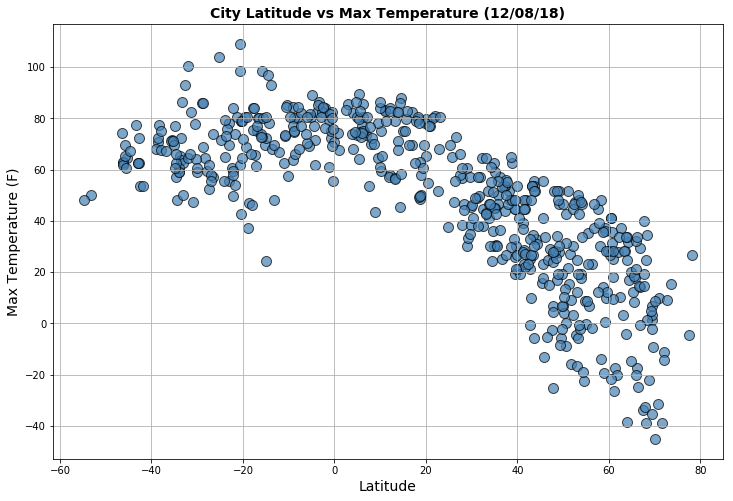

In [6]:
weatherpy_scatter(wdf,
                  'maxtemp',
                  'City Latitude vs Max Temperature (12/08/18)',
                  'Latitude',
                  'Max Temperature (F)')

#### Latitude vs. Humidity Plot

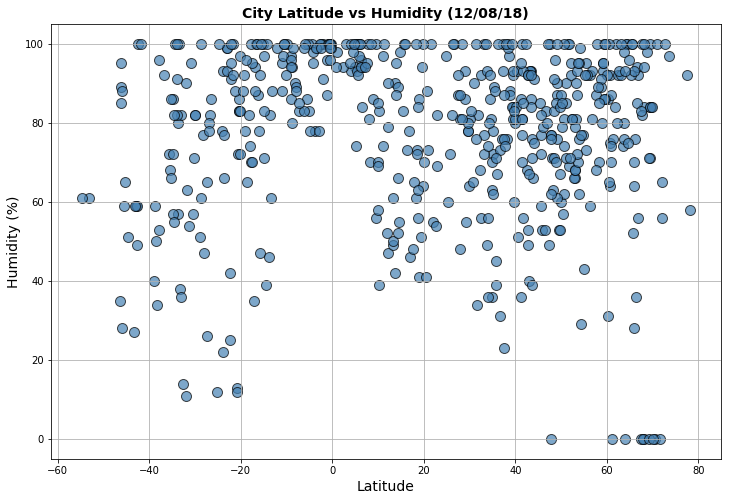

In [7]:
weatherpy_scatter(wdf,
                  'humidity',
                  'City Latitude vs Humidity (12/08/18)',
                  'Latitude',
                  'Humidity (%)')

#### Latitude vs. Cloudiness Plot

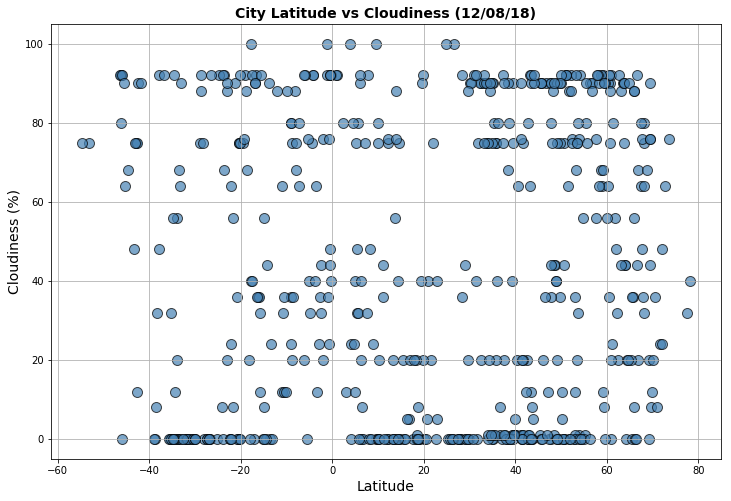

In [8]:
weatherpy_scatter(wdf,
                  'cloudiness',
                  'City Latitude vs Cloudiness (12/08/18)',
                  'Latitude',
                  'Cloudiness (%)')

#### Latitude vs. Wind Speed Plot

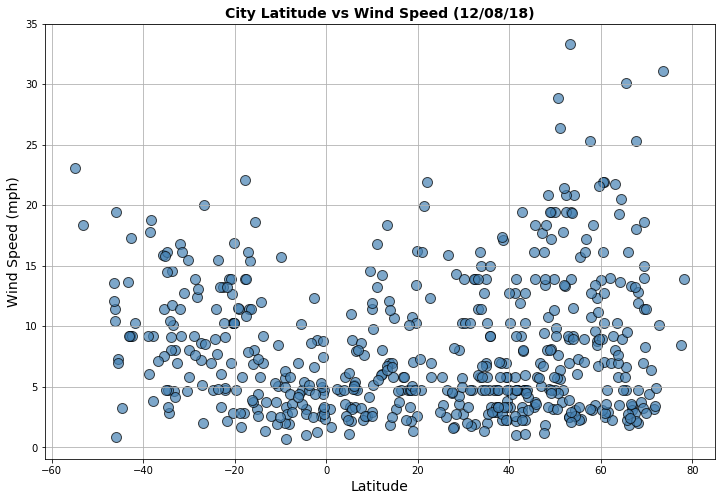

In [9]:
weatherpy_scatter(wdf,
                  'windspeed',
                  'City Latitude vs Wind Speed (12/08/18)',
                  'Latitude',
                  'Wind Speed (mph)')